## Exploratory Data Analysis (EDA)

#### Task 1: Undertake the crucial task of conducting exploratory data analysis to understand the distribution of features(at least 3) and the target variable (bank data).

#### Task 2: Visualize the relationships between features(e.g., age, income, and loan amount) and the target variable using scatter plots, histograms, and box plots. This step is crucial in understanding the data distribution.

#### Task 3: Identify and thoroughly explain how you will handle outliers in the dataset. This is a critical step in ensuring the accuracy of your analysis.

### Expectations:

#### You must submit this assessment in a Jupyter Notebook format.
#### You must use comments and or markdowns to explain your thought process.
#### Your notebook must be self-explanatory and titled with your full name and email address.
#### This is a graded assignment and part of your continuous assessment.
#### You must submit this assessment on or before the 12th of July, 11:59 pm.
Submission link



In [51]:
import pandas as pd  # Import pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical operations
import seaborn as sns  # Import seaborn for advanced statistical data visualization

import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output


In [3]:
bank_data = pd.read_csv('bank-full.csv', sep=';') #Loading the dataset

In [4]:
bank_data.head(10) # viewing the first 5 rows of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank_data.shape # Checking for the dimension of the dataset

(45211, 17)

In [6]:
bank_data.columns # Checking to know all the columns in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
bank_data.info() # checking to see the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank_data.isna().sum() # checking to see if the is missing values in the datasets

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank_data.duplicated().sum()  # Checking datasets for duplicates row

0

In [10]:
bank_data.columns.duplicated() # Checking datasets for duplicates columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

### TASK 1

In [12]:
bank_data.head() # Show the first 5 row of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
bank_data.shape # To check the shape/ dimension of the dataset

(45211, 17)

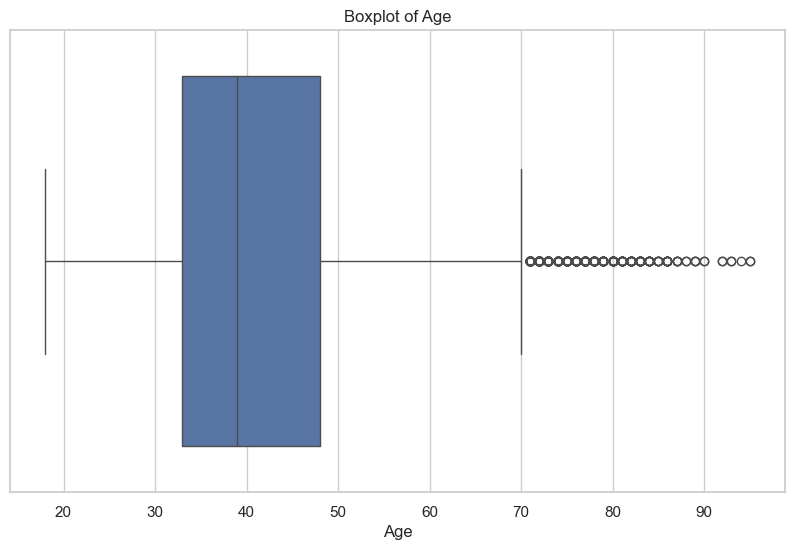

In [70]:
# Creating a boxplot for 'age'
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches by 6 inches
sns.boxplot(x=bank_data['age'])  # Create a box plot to visually identify outliers in the 'age' feature from 'bank_data'
plt.title('Boxplot of Age')  # Set the title of the plot
plt.xlabel('Age')  # Set the label for the x-axis
plt.show()  # Display the plot

In [24]:
bank_data.age.describe() # Getting the summary statistics of Age

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [22]:
bank_data.age.skew() # Getting the skew value for Age

0.6848179257252598

### Age (0.684818): Moderately right-skewed.

A skew value of 0.68 indicates a moderate positive skew in the age distribution. Here's what this means in the context of your boxplot and age distribution:


The skewness value of 0.68 suggests that the distribution of ages is moderately skewed to the right. This means that there are more younger individuals, with fewer older individuals stretching out the right tail of the distribution.
Distribution Shape:

The majority of the data points (ages) are clustered to the left (younger ages), with the tail extending towards the right (older ages). The boxplot shows this as there are several outliers on the higher end of the age range.

#### Central Tendency and Spread

The median age (the line inside the box) is less than the mean age. In positively skewed distributions, the mean is typically greater than the median because the higher values pull the mean to the right.
Interquartile Range (IQR):

The IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3), This shows the middle 50% of the data. The boxplot shows that this range is approximately from 33 to 48 years.

#### Outliers

The points outside the whiskers on the right side of the boxplot represent the outliers, which are ages significantly higher than the rest of the data. These outliers contribute to the positive skew.

##### N/B: Please refer to Task 3 for further calculation of the outliers

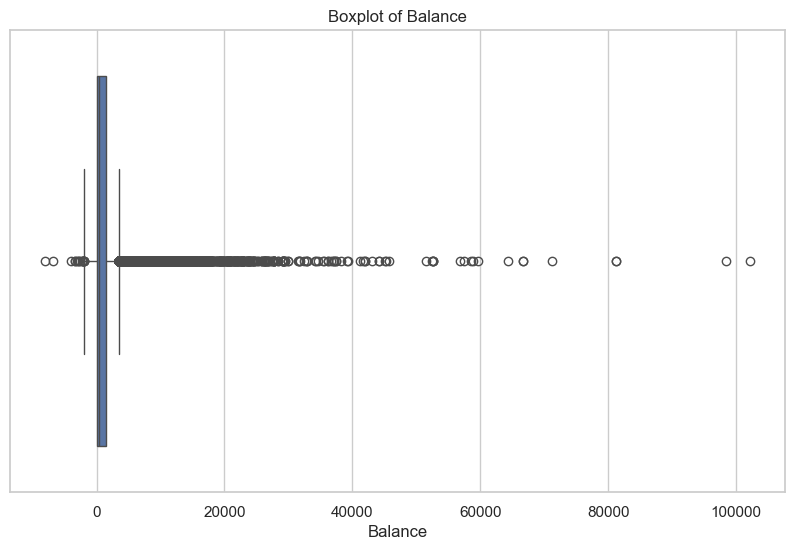

In [71]:
# Creating a simple boxplot for balance distribution
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches by 6 inches
sns.boxplot(x='balance', data=bank_data)  # Create a box plot to visually identify the distribution and outliers in the 'balance' feature from 'bank_data'
plt.title('Boxplot of Balance')  # Set the title of the plot
plt.xlabel('Balance')  # Set the label for the x-axis
plt.show()  # Display the plot


In [43]:
bank_data.balance.describe() #Checking summary statistics for balance

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [47]:
bank_data.balance.skew() # checking the skew value for balance

8.360308326166326

### Median and Interquartile Range (IQR)

The box plot's central line represents the median of the balance values. The box itself shows the interquartile range (IQR), which contains the middle 50% of the data (from the 25th to the 75th percentile).

#### Whiskers and Outliers

The whiskers extend to the smallest and largest values within 1.5 times the IQR from the 25th and 75th percentiles, respectively. Points beyond these whiskers are considered outliers and are represented as individual dots.

#### Skewness

The majority of the data points are concentrated near the lower end of the balance range, with a long tail extending to higher values. This is consistent with the skewness value of 8.36, indicating a highly positively skewed distribution.



### N/B: Please refer to Task 3 for further calculation of the outliers


#### To better understand the distribution, we can apply a log transformation, which can reduce skewness and make the distribution more interpretable.

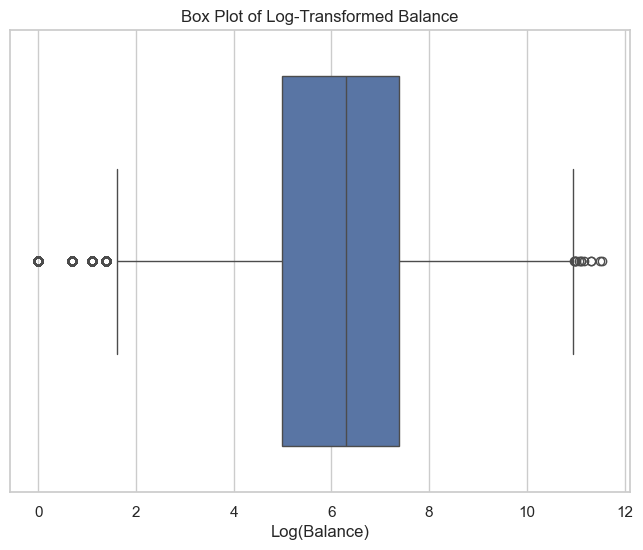

In [64]:
# Applying log transformation to the balance
bank_data['log_balance'] = np.log1p(bank_data['balance'])

# Plot the box plot for log-transformed balance
plt.figure(figsize=(8, 6)) # Setting the figure size
sns.boxplot(bank_data, x='log_balance') # Plottting the logarithm of balance
plt.title('Box Plot of Log-Transformed Balance') # Title of the plot
plt.xlabel('Log(Balance)') #labelling the x axes
plt.show()


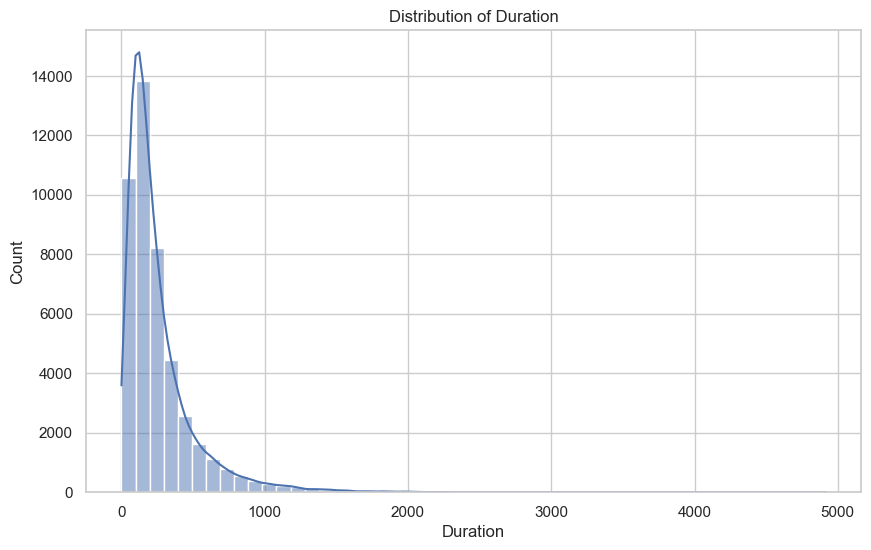

In [72]:
# Plotting distribution for Duration of call
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches by 6 inches
sns.histplot(bank_data, x='duration', bins=50, kde=True)  # Create a histogram with 50 bins and a kernel density estimate (KDE) for the 'duration' feature from 'bank_data'
plt.title('Distribution of Duration')  # Set the title of the plot
plt.xlabel('Duration')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


In [29]:
bank_data.duration.describe() # summary statistics of duration

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [30]:
bank_data.duration.skew() #skew value of duration

3.144318099423456

### Duration (3.144318099423456): High Positive skewed.

#### Positive Skew

The skewness value of 3.14 shows that the distribution of call durations is highly skewed to the right. This means that most of the call durations are relatively short, with a few calls lasting significantly longer.

#### Distribution Shape

In the distribution, the majority of the data points (call durations) are clustered to the left (shorter durations), with a long tail extending towards the right (longer durations). The histogram shows this, showing a peak near the lower duration values and a long tail stretching out to higher duration values.

#### Central Tendency

The mean duration is greater than the median duration. In highly positively skewed distributions, the mean is pulled to the right by the long tail of higher values, resulting in a mean that is higher than the median.

#### Spread of Data

The data is spread out with most of the call durations falling below 1000 seconds. There are a few outliers with very high durations that extend the tail of the distribution to the right.

##### N/B: Please refer to Task 3 for further calculation of the outliers

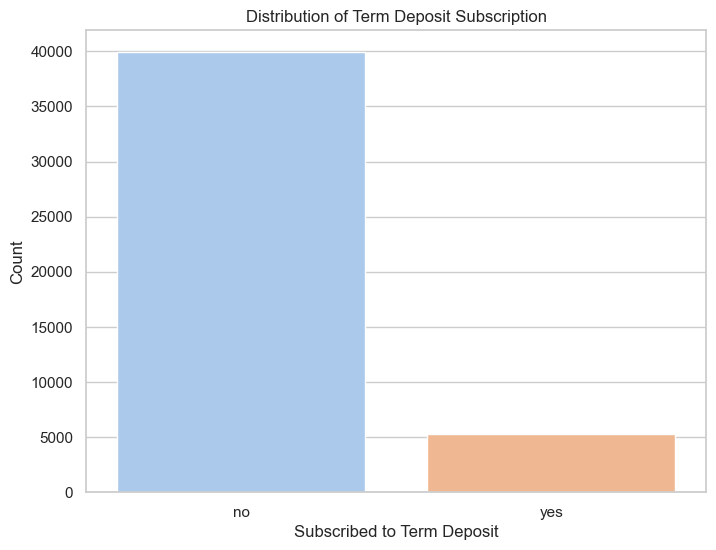

In [73]:
sns.set(style="whitegrid")  # Set the aesthetic style of the plots to "whitegrid"

# Plotting the distribution of 'y'
plt.figure(figsize=(8, 6))  # Create a new figure with a size of 8 inches by 6 inches
sns.countplot(x='y', data=bank_data, palette='pastel')  # Create a count plot for the 'y' feature from 'bank_data' with a pastel color palette
plt.title('Distribution of Term Deposit Subscription')  # Set the title of the plot
plt.xlabel('Subscribed to Term Deposit')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.show()  # Display the plot


The bar plot shows the distribution of the binary variable y, which indicates whether customers subscribed to a term deposit. 

The plot indicates a clear imbalance between the two classes, with significantly more customers not subscribing to a term deposit (no) compared to those who did (yes).

##### N/B: Not enough information can be drawn from the countplot, so we will use boxplot to get the relationship of the y distribtution with the duration below

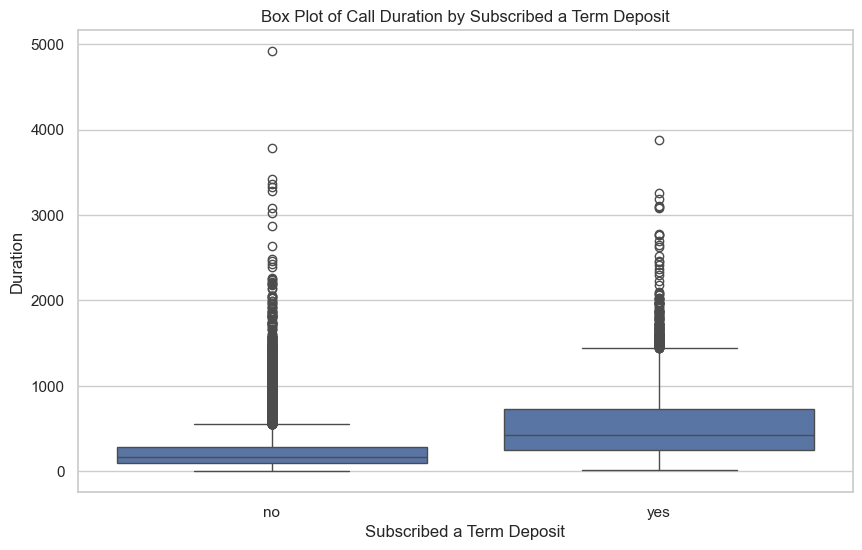

In [75]:
plt.figure(figsize=(10, 6))  # Set up the plot size

sns.boxplot(x='y', y='duration', data=bank_data)  # Create a boxplot of duration by subscription status
plt.title('Box Plot of Call Duration by Subscribed a Term Deposit')  # Add a title to the plot
plt.xlabel('Subscribed a Term Deposit')  # Label the x-axis
plt.ylabel('Duration')  # Label the y-axis
plt.show()  # Display the plot

### The box plot shows the distribution of call durations for customers who did and did not subscribe to a term deposit. Here's what the plot tells us

#### Median Duration

The median call duration for customers who subscribed (yes) is higher than for those who did not (no). This is indicated by the central line in each box, which represents the median.
Interquartile Range (IQR):

#### The IQR (the box) is larger for the yes group than for the no group. This means there is more variability in call durations for customers who subscribed.

#### Overall Distribution

The yes group has longer call durations overall, as seen by the position of the box and whiskers.
The no group has a more concentrated duration distribution, with many calls being shorter and more clustered towards the lower end.

#### N/B: Please refer to Task 3 for further calculation of the outliers

### TASK 2 : Visualize the relationships between features(e.g., age, income, and loan amount) and the target variable using scatter plots, histograms, and box plots. This step is crucial in understanding the data distribution.

In [183]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


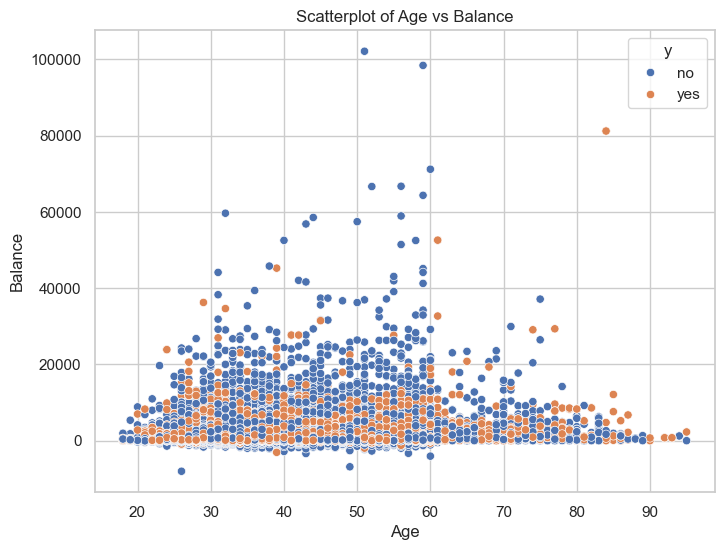

In [58]:
# Relation between Age vs Balance and Term Deport Subscription
plt.figure(figsize=(8,6)) # Setting the figure size before creating the scatterplot

sns.scatterplot(bank_data, x="age", y="balance", hue="y") # Create scatterplot

plt.title('Scatterplot of Age vs Balance and Term Deport Subscription') # plot title
plt.xlabel('Age') # label for x axes
plt.ylabel('Balance') # labelling y axes
plt.show() # Show plot

### Observation
The scatterplot shows the relationship between age and balance, with points colored based on whether the client subscribed to a term deposit (y).


Most data points are concentrated at lower balances, regardless of age.
The balance values are mostly under 20,000, with some outliers reaching much higher values (up to 100,000).
Age Distribution:

The ages of clients range from about 20 to 90 years.
A higher concentration of clients is observed in the age range of 30 to 60 years.

Clients with higher balances (above 20,000) are fewer and are scattered across different age groups.
Both clients who subscribed and those who did not are present across the balance spectrum, but the majority of term deposit subscriptions (orange points) appear to be among clients with lower balances.



### Interpretation

#### Age vs. Balance:

The balance doesn't show a strong correlation with age. Clients of various ages have similar balance distributions, primarily concentrated below 20,000.
Older clients (above 60) tend to have fewer high-balance outliers.

#### Term Deposit Subscription

There isn't a clear pattern suggesting that either age or balance significantly impacts whether a client subscribes to a term deposit. Both subscribers and non-subscribers are distributed similarly across ages and balances.

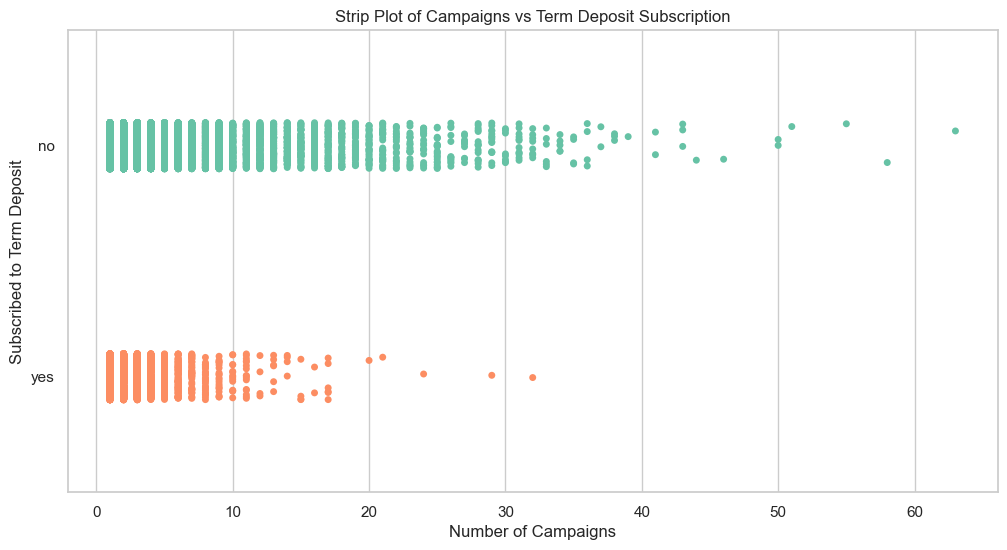

In [60]:
# Relationship between campaign and Term deposit subscription

# Strip Plot
plt.figure(figsize=(12, 6))  # Setting the figure size of the plot
sns.stripplot(data=bank_data, x="campaign", y="y", jitter=True, palette="Set2") # visualize with stripplot
plt.title('Strip Plot of Campaigns vs Term Deposit Subscription') # Plot title
plt.xlabel('Number of Campaigns') # labelling x axes
plt.ylabel('Subscribed to Term Deposit') # labelling y axes
plt.show() # display plot

#### This strip plot show the relationship between the number of campaigns a customer was contacted for and whether they subscribed to a term deposit (`y`).

### Interpretation

####  1.Y-axis ("y")

he "no" category indicates customers who did not subscribe to the term deposit.
The "yes" category indicates customers who subscribed to the term deposit.

####  2.X-axis ("campaign")
   This represents the number of times a customer was contacted during the campaign.

####  3.Observations
There is a high density of customers with fewer campaign contacts (e.g., fewer than 10) in both "no" and "yes" categories.
    For those who did not subscribe ("no"), the number of campaigns ranges widely, with some being contacted as many as 60 times.
For those who subscribed ("yes"), most were contacted fewer times, generally fewer than 20 times, with very few being contacted more than 20 times.


### Inference

#### Higher Contact Frequency

Customers who were contacted more frequently (more than 20 times) are less likely to subscribe, indicating potential diminishing returns or even negative returns with too many contact attempts.

#### Lower Contact Frequency

There is a higher success rate for subscription within the lower range of campaign contacts (fewer than 10), suggesting that fewer, more targeted contacts might be more effective.

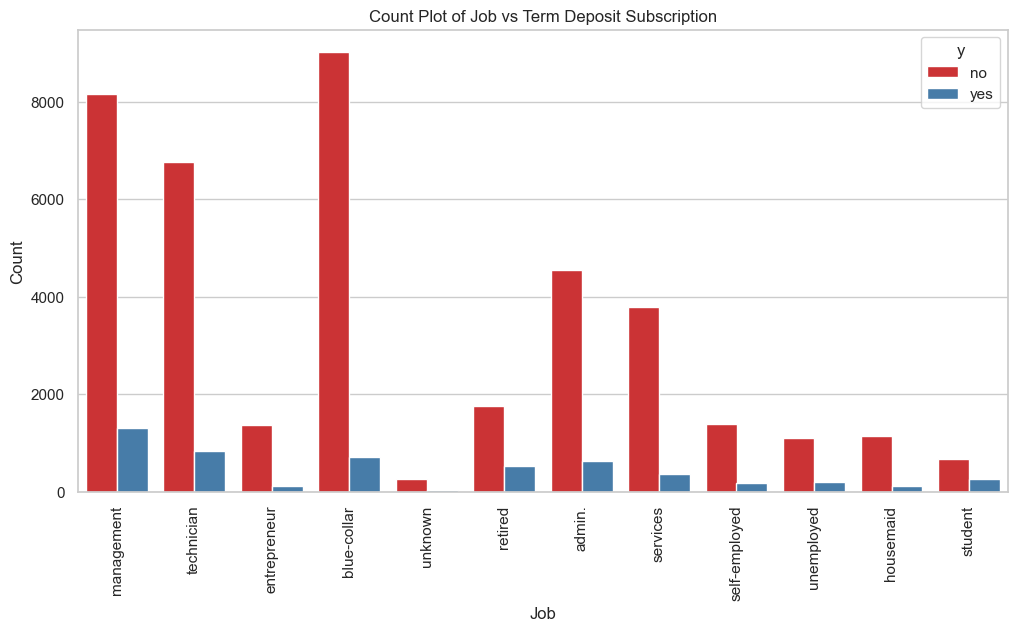

In [77]:
# Relationshop between job and y( whether they bought term deposit)
# Seting the plot style for better aesthetics
sns.set(style="whitegrid")

# Creating the count plot for job and y
plt.figure(figsize=(12, 6)) #Setting the figure size
sns.countplot(bank_data, x='job', hue='y', palette='Set1') # visualize with seaborn countplot
plt.xticks(rotation=90)  # Rotating the x labels for better readability
plt.title('Count Plot of Job vs Term Deposit Subscription') # Plot title
plt.xlabel('Job') #labelling x axis 
plt.ylabel('Count') #labelling y axis 
plt.show() #display plot

#### From the countplot, We can  observe the distribution of term deposit subscriptions across different job categories.

### General Observation

In most job categories, the number of people who did not subscribe to a term deposit ("no") is significantly higher than those who did ("yes").

### Job Categories with High Non-Subscription


#### Management: The largest group, with a substantial number of non-subscribers compared to subscribers.

#### Technician: Similarly, a high count of non-subscribers compared to subscribers.

#### Blue-collar: Very high non-subscription rates, indicating that blue-collar workers are less likely to subscribe to term deposits.

#### Admin and Services: These job categories also show a significant number of non-subscribers.


### Job Categories with Higher Proportion of Subscribers:

#### Retired: Although the non-subscribers still outnumber subscribers, the proportion of subscribers is higher compared to other categories. This could suggest that retired individuals are more inclined to invest in term deposits.

#### Students: This category has a relatively small sample size, but the number of subscribers is closer to the number of non-subscribers, indicating a higher interest in term deposits among students.


### Other Categories


#### Entrepreneur, Self-employed, Unemployed, Housemaid: These categories show a higher number of non-subscribers with a relatively smaller number of subscribers.

#### Unknown: Very few individuals, with the majority not subscribing to term deposits.



## Insights

The the plot suggests that job type has a significant impact on the likelihood of subscribing to a term deposit.
Individuals in certain job categories like management, technicians, and blue-collar workers show a strong tendency not to subscribe to term deposits.

Retired individuals and students might be more interested in subscribing to term deposits compared to other groups.


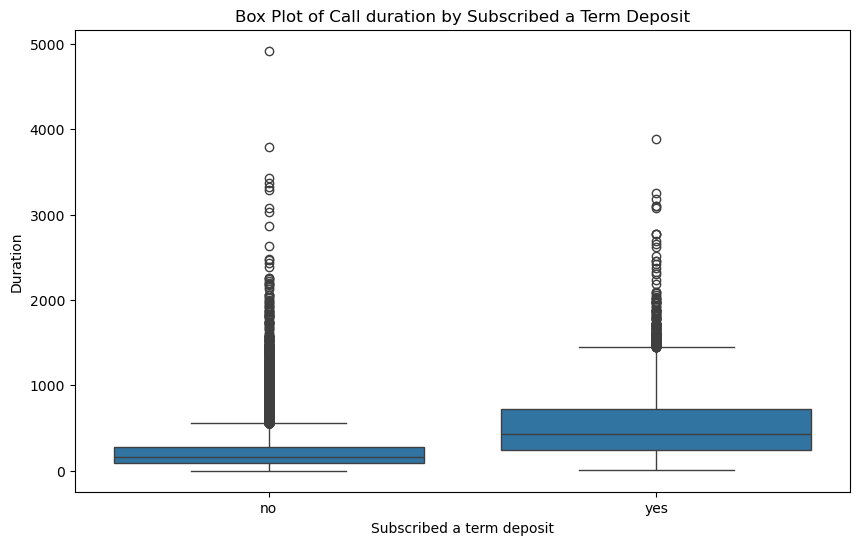

In [192]:
# Plot of the relationship between DUration and Target variable (y)

plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=bank_data)
plt.title('Box Plot of Call duration by Subscribed a Term Deposit')
plt.xlabel('Subscribed a term deposit')
plt.ylabel('Duration')
plt.show()

### The box plot shows the distribution of call durations for customers who did and did not subscribe to a term deposit. Here's what the plot tells us

#### Median Duration

The median call duration for customers who subscribed (yes) is higher than for those who did not (no). This is indicated by the central line in each box, which represents the median.
Interquartile Range (IQR):

#### The IQR (the box) is larger for the yes group than for the no group. This means there is more variability in call durations for customers who subscribed.

#### Overall Distribution

The yes group has longer call durations overall, as seen by the position of the box and whiskers.
The no group has a more concentrated duration distribution, with many calls being shorter and more clustered towards the lower end.

### Task 3: Identify and thoroughly explain how you will handle outliers in the dataset.

In [ ]:
# Outliers for Age,balance, duration

In [25]:
bank_data.describe() # Checking for the summary statistics of all the numerical features in the bank_data datasets

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [115]:
bank_data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [163]:

# General Function to detect and analyze outliers for any numerical feature, just call the function with the a feature.
def analyze_outliers(data, feature):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data[feature] < lower_limit) | (data[feature] > upper_limit)
    
    # Print the results
    print(f' Lower limit for {feature}: {lower_limit}')
    print(f' Upper limit for {feature}: {upper_limit}')
    print(f' IQR for {feature}: {IQR}')
    print(f' Number of outliers in {feature}: {len(data[feature][outliers])}')
    print(f' Number of non-outliers in {feature}: {len(data[feature]) - len(data[feature][outliers])}')
    
    # Return the outliers and non-outliers
    return data[feature][outliers], data[feature][~outliers]


In [160]:
# Getting outliers for the 'age' feature
outliers, non_outliers = analyze_outliers(bank_data, 'age') # Calling the analyze_outliers function with age and the bank_data

 Lower limit for age: 10.5
 Upper limit for age: 70.5
 IQR for age: 15.0
 Number of outliers in age: 487
 Number of non-outliers in age: 44724


In [166]:
bank_data.age.kurtosis() # Checking the the measure of outliers present in a using (Kurtosis)

0.3195703759105042

### Kurtosis is the measure of outliers present in the data.

#### High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3)

##### From the Kurtosis scale It shows that age have a kurtosis of less than 3 (<3).  which should mean it has little to no outliers. but from the calculations,  they are 487 outliers in the age feature. 

A kurtosis value of 0.32 indicates that the age distribution has slightly more weight in its tails and a slightly sharper peak compared to a normal distribution. This value suggests that the distribution is relatively close to normal but has a bit more outliers than a perfectly normal distribution.

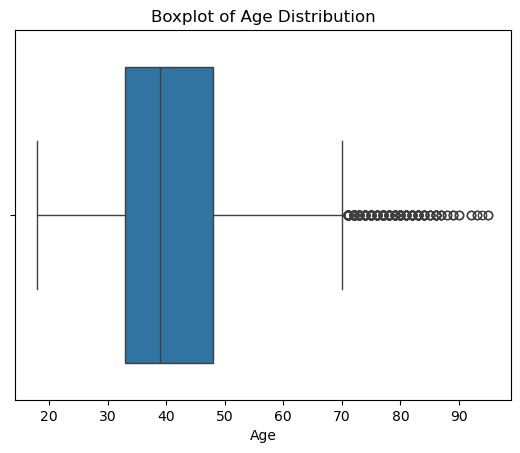

In [27]:
sns.boxplot(bank_data, x='age'); # Graphical analysis for outliers with boxplot
plt.title('Boxplot of Age Distribution') # Title of the plot
plt.xlabel('Age') # labelling x axes
plt.show() #display plot

In [169]:
bank_data.age.median() #median for age distribution

39.0

##### INFERENCE FROM BOXPLOT

Box:

The box shows that the middle 50% of the age data falls between approximately 30 and 50 years.

Interquartile Range (IQR): The central box spans from the first quartile (Q1, 25th percentile) to the third quartile (Q3, 75th percentile).
Median: The line inside the box represents the median (50th percentile) of the age distribution, which appears to be around 39-40 years(39 years from the statistical analysis).

Whiskers:

The whiskers extend from the edges of the box to 1.5 times the IQR from Q1 and Q3.
These whiskers represent the range within which most of the age distribution fall (approximately 20 to 70 years).

Outliers:

The points plotted beyond the whiskers are the outliers.
The plot shows a number of outliers above the age of 70. These points are individual data points that fall outside the expected range of the majority of the data.
Statistical calculations show that the number of outliers is 487 for the age distribution


#### HANDLING OUTLIERS IN AGE


Capping and Flooring:

Replacing extreme values beyond a certain percentile (e.g., 1st and 99th percentiles) with the values at those percentiles.
This reduces the influence of extreme outliers without removing data points.
Transformation:

Applying transformations such as logarithmic, square root, or Box-Cox transformations to reduce skewness and the impact of outliers.
Binning:

Converting the age values into categorical bins (e.g., age groups) to reduce the impact of individual outliers.

In [ ]:
# Checking for outliers in the balance feature

In [84]:
bank_data.balance.describe() # Getting the summary statistics for balance

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [167]:
# Analyze outliers for the 'balance' feature
outliers, non_outliers = analyze_outliers(bank_data, 'balance') # Calling the analyze_outliers function with balance and the bank_data

 Lower limit for balance: -1962.0
 Upper limit for balance: 3462.0
 IQR for balance: 1356.0
 Number of outliers in balance: 4729
 Number of non-outliers in balance: 40482


In [172]:
bank_data.balance.kurtosis()

140.75154662504158



The kurtosis value of 140.75 suggests a highly peaked distribution with heavy tails, indicating the presence of extreme outliers.
From the statistics, it shows that balance has a total outlier count of 4729

#### HANDLING OUTLIERS ON THE BALANCE DISTRIBUTION

Balance
Capping and Flooring:

Cap the balance values at the 1st and 99th percentiles or another chosen threshold.
Transformation:

Use logarithmic transformation to compress the range and reduce the impact of high balance values.
Truncation:

Remove the top and bottom extreme values directly if they are significantly affecting the analysis.

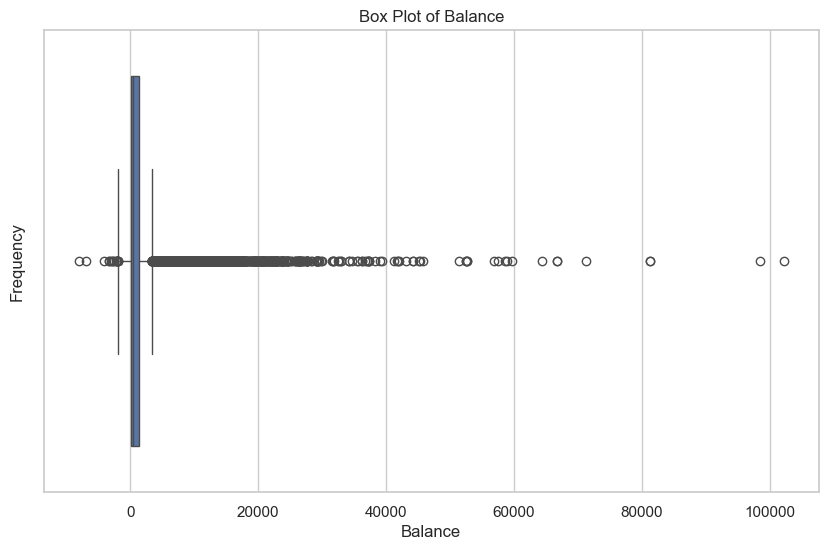

In [69]:
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches by 6 inches
sns.boxplot(x='balance', data=bank_data);  # Create a box plot to visually identify outliers in the 'balance' feature from 'bank_data'
plt.title('Box Plot of Balance')  # Set the title of the plot
plt.xlabel('Balance')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis (though not strictly necessary for a boxplot)
plt.show()  # Display the plot


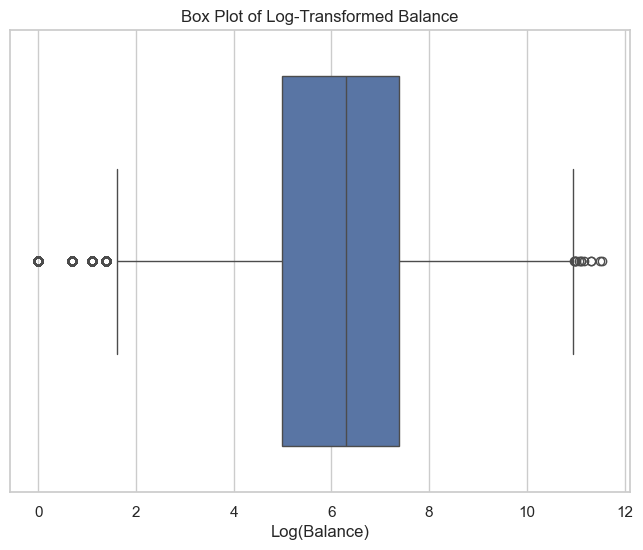

In [68]:
# Applying log transformation to the balance
bank_data['log_balance'] = np.log1p(bank_data['balance'])  # Apply log transformation to the 'balance' column and store it in a new column 'log_balance'

# Plot the box plot for log-transformed balance
plt.figure(figsize=(8, 6))  # Create a new figure with a size of 8 inches by 6 inches
sns.boxplot(x=bank_data['log_balance'])  # Create a box plot for the log-transformed balance
plt.title('Box Plot of Log-Transformed Balance')  # Set the title of the plot
plt.xlabel('Log(Balance)')  # Set the label for the x-axis
plt.show()  # Display the plot


#### Inference

The box plot provided indicates that there are significant outliers in the balance feature of your bank_data.

From the boxplot, it could be seen that they are outliers in both the lower_limit and upper_limit of the balance distribution, as also shown from the kurtosis of 140.75

In [126]:
bank_data.duration.describe() # Getting the summary statistics for duration

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [168]:
outliers, non_outliers = analyze_outliers(bank_data, 'duration')  # Calling the analyze_outliers function with duration and the bank_data

 Lower limit for duration: -221.0
 Upper limit for duration: 643.0
 IQR for duration: 216.0
 Number of outliers in duration: 3235
 Number of non-outliers in duration: 41976


In [174]:
bank_data.duration.kurtosis()

18.153915269019706

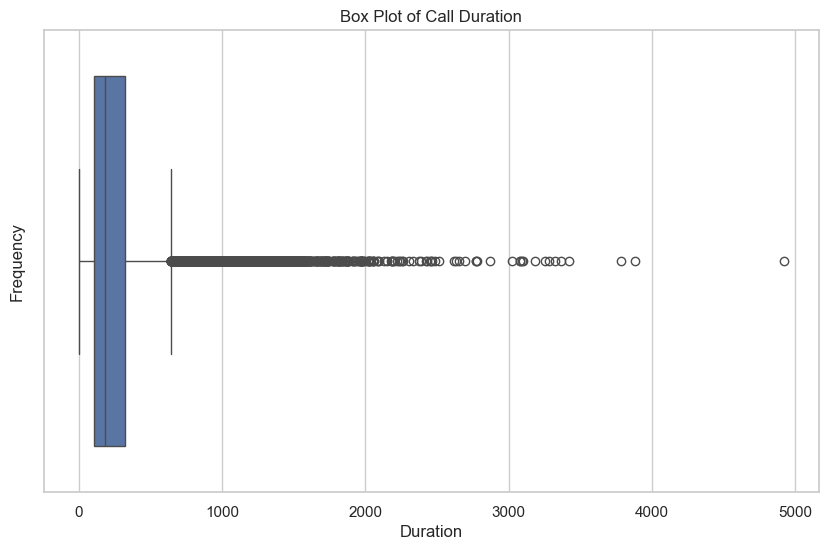

In [67]:
# Getting outliers for the 'duration' feature
plt.figure(figsize=(10, 6))  # Create a new figure with a size of 10 inches by 6 inches
sns.boxplot(x='duration', data=bank_data);  # Create a box plot to visually identify outliers in the 'duration' feature from 'bank_data'
plt.xlabel('Duration')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis (though not strictly necessary for a boxplot)
plt.title('Box Plot of Call Duration')  # Set the title of the plot
plt.show()  # Display the plot


#### Inference

Kurtosis

The box plot and calculated kurtosis(18.35) highlight the presence of extreme outliers in the duration feature.Statistical it was calculated that the number of outliers in duration is 3235. Analyzing these outliers can help in understanding anomalies in the dataset, which could be due to data entry errors, special cases, or significant deviations from the normal data distribution.


#### HANDLING OUTLIERS IN DURATION

Capping and Flooring:
Similarly to age, setting upper and lower limits based on percentiles to cap extreme values.

Transformation:
Applying transformations like log or square root to reduce the skewness and impact of outliers.

Winsorizing:

Adjusting extreme values to be closer to the mean. Winsorizing replaces the smallest and largest values with the closest values within the desired percentile.

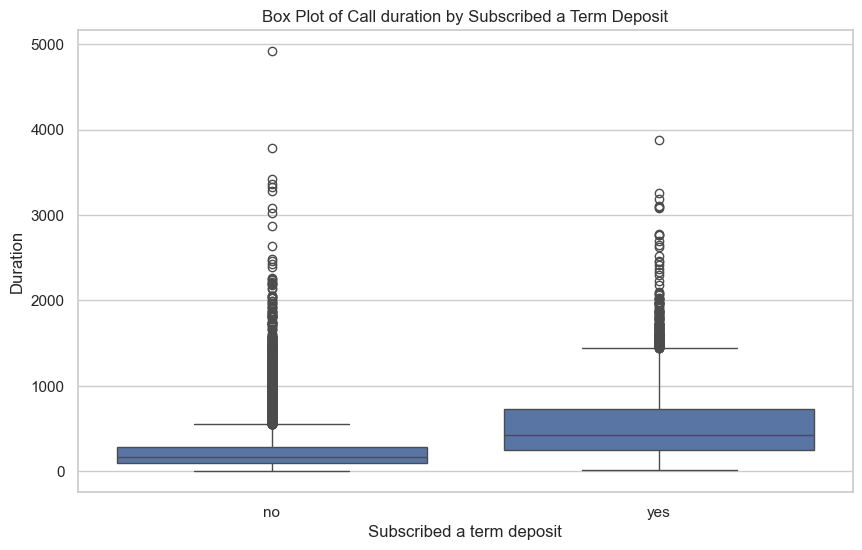

In [66]:

plt.figure(figsize=(10, 6))  # Creating a new figure with a size of 10 inches by 6 inches.
sns.boxplot(x='y', y='duration', data=bank_data)  # Creating a box plot with 'y' on the x-axis and 'duration' on the y-axis using the data from 'bank_data'.
plt.title('Box Plot of Call duration by Subscribed a Term Deposit')  # Setting the title of the plot.
plt.xlabel('Subscribed a term deposit')  # Setting the label for the x-axis.
plt.ylabel('Duration')  # Setting the label for the y-axis.
plt.show()  # Display the plot.


In [195]:
# Define a function to calculate outliers in a special situation when assessing outliers for yes and no in call duration
def calculate_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # calculating the lower_bound
    upper_bound = Q3 + 1.5 * IQR # calculating the lower_bound
    outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    return outliers

# Calculate outliers for 'yes' and 'no' categories in 'y'
outliers_yes = calculate_outliers(bank_data[bank_data['y'] == 'yes'], 'duration')
outliers_no = calculate_outliers(bank_data[bank_data['y'] == 'no'], 'duration')

# Count the outliers
count_outliers_yes = outliers_yes.sum()
count_outliers_no = outliers_no.sum()

# Count the total number of 'yes' and 'no' values
total_yes = (bank_data['y'] == 'yes').sum()
total_no = (bank_data['y'] == 'no').sum()

print(f'Number of outliers for subscribed (yes): {count_outliers_yes}')
print(f'Number of outliers for not subscribed (no): {count_outliers_no}')
print(f'Total number of subscribed (yes): {total_yes}')
print(f'Total number of not subscribed (no): {total_no}')


Number of outliers for subscribed (yes): 167
Number of outliers for not subscribed (no): 2384
Total number of subscribed (yes): 5289
Total number of not subscribed (no): 39922


The box plot shows the distribution of call durations for customers who did and did not subscribe to a term deposit. Here's what the plot tells us

Median Duration:

The median call duration for customers who subscribed (yes) is higher than for those who did not (no). This is indicated by the central line in each box, which represents the median.
Interquartile Range (IQR):

The IQR (the box) is larger for the yes group than for the no group. This means there is more variability in call durations for customers who subscribed.
Whiskers and Outliers:

#### Both groups have numerous outliers, represented by the dots outside the whiskers.
#### The whiskers extend to show the range of the data up to 1.5 times the IQR.The points beyond this range are outliers.

#### There are many more outliers in the no group compared to the yes group, especially at higher durations.

The presence of many outliers, especially in the no group, indicates that while most calls are relatively short, there are a significant number of exceptionally long calls where the customer still did not subscribe. These might be worth investigating further to understand why these longer calls did not result in a subscription.


### HANDLING OUTLIERS

Understanding the Cause of Outliers in this situation

Investigating the reasons behind exceptionally long calls, especially for non-subscribers.

Determining  if these outliers are due to data entry errors, unusual circumstances, or represent genuine variability.


If the outliers represent meaningful data, consider analyzing them separately to understand patterns or reasons behind the longer call durations.

#### Transformation:

Applying transformations to normalize the data

Log Transformation: Reduces the impact of large values.
Square Root Transformation: Another way to reduce skewness.
Box-Cox Transformation: Can be used if the data contains positive values.

#### Capping and Flooring:

Setting thresholds for call durations, capping values at the 95th or 99th percentile to reduce the impact of extreme outliers.
Example: Any call duration above a certain threshold (e.g., 95th percentile) can be set to that threshold value.

Winsorizing:

Adjusting the extreme values to be closer to the mean or within a specified percentile range.
This method retains all data points but reduces the influence of extreme values.
Remove Outliers:

If the outliers are determined to be data entry errors or irrelevant, remove them from the dataset.
This should be done cautiously to avoid losing valuable information.

### General Outlier Handling Strategies

Robust Scaler:

Use robust scaling methods that are less sensitive to outliers, such as the median and IQR for scaling instead of mean and standard deviation.

Domain Knowledge: Leveraging domain expertise to set reasonable thresholds for capping and flooring, understanding what constitutes an outlier in the context of the specific field.

Iterative Approach: Iteratively identify and handle outliers, assessing the impact on model performance and data distribution after each step.

Data Imputation: Replacing outlier values with the median or another central tendency measure, ensuring that the imputed values are within a reasonable range.

### CONCLUSION



### Key findings and actions from the Exploratory Data Analysis (EDA):

Age Distribution: We examined the age distribution, identifying a wide range of ages among the customers. Boxplots was used to visualize the data, revealing some outliers.

Balance Distribution: The balance data was highly skewed, with a skewness value of 8.36. We applied a log transformation to normalize the distribution, improving our ability to analyze and model this feature.

Campaign and Response Relationship: The relationship between the number of contacts during the campaign and the subscription to term deposits was investigated using strip plots. This shows how customer contact frequency affects their likelihood of subscribing.


### Visualization and Interpretation

###### Scatter Plots: These were used to explore the relationships between age, balance, and term deposit subscription (y). The scatter plot revealed that higher balances were more common among older customers, but subscriptions did not consistently correlate with higher balances.

###### Count Plots: These helped us understand the distribution of jobs among customers and how job types related to term deposit  subscriptions. This visualization highlighted specific job categories that were more or less likely to subscribe to term deposits.

###### Box Plots: By comparing call durations for customers who did and did not subscribe, we found that subscribers tended to have longer call durations. This information is crucial for optimizing call strategies in future campaigns.

### Insights and Recommendations

Call Duration: Longer call durations appear to be associated with higher subscription rates. Efforts to improve call quality and engagement during these interactions may increase subscription rates.

Targeted Campaigns: Understanding the distribution of customers by job type and balance can help in designing targeted marketing campaigns. For instance, certain job categories showed higher subscription rates, indicating that targeted offers could be more effective.

Outlier Management: Proper handling of outliers is essential for accurate analysis and model performance. Employing techniques like log transformation, capping, and winsorizing ensures that extreme values do not skew results.


#### Future Work

Predictive Modeling: With the cleaned and transformed data, the next step would be to develop predictive models to identify potential subscribers. Techniques like logistic regression, decision trees, or more advanced machine learning models can be employed.

Feature Engineering: Creating additional features based on domain knowledge and insights from the EDA could improve model performance.

Cross-Validation: Implementing cross-validation techniques will help ensure the robustness and generalizability of the predictive models.

A/B Testing: For campaign strategies, conducting A/B tests could provide valuable data on the effectiveness of different approaches, further refining marketing efforts.

